<a href="https://colab.research.google.com/github/AmadorAreth/Data-Science/blob/main/TP1/((Amador))_03_Introducci%C3%B3n_al_aprendizaje_profundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aprendizaje profundo - Sesi√≥n 3  üß†**

> **Descripci√≥n:** Cuaderno de contenidos del m√≥dulo de aprendizaje profundo para el Dimplomado en Ciencia de Datos de la ENES UNAM Le√≥n, 2024. <br>
> **Autor:** [Rodolfo Ferro](https://github.com/RodolfoFerro) <br>
> **Contacto:** [ferro@cimat.mx](mailto:ferro@cimat.mx)


## Contenido

### Secci√≥n I

1. Overfitting vs. Underfitting
2. Regularizaci√≥n:
    - Dropout
    - Early Stopping

### Secci√≥n II

3. Problemas de regresi√≥n

### Secci√≥n III

4. Problemas de clasificaci√≥n

## **Secci√≥n I**

### **IMPORTANTE**

El contenido de esta secci√≥n ha sido descrito en su totalidad a trav√©s de la presentaci√≥n.

Conviene revisar el material que puedes encontrar en el [repositorio](https://github.com/RodolfoFerro/modulo-deep-learning).

### **Ejemplo de Early Stopping**

In [ ]:
import tensorflow as tf
import numpy as np


# Sample data (XOR)
x = np.array([(0, 0), (1, 0), (0, 1), (1, 1)])
y = np.array([0, 1, 1, 0])


# Creates the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='linear'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compile the model
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.6)

model.compile(optimizer=optimizer, loss=loss, metrics=[loss])

In [ ]:
# Create a callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
history = model.fit(x, y, epochs=1000, callbacks=[callback])

Epoch 1/1000
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step - loss: 0.2566 - mean_squared_error: 0.2566
Epoch 2/1000
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 400ms/step - loss: 0.2556 - mean_squared_error: 0.2556
Epoch 3/1000
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 56ms/step - loss: 0.2548 - mean_squared_error: 0.2548
Epoch 4/1000
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step - loss: 0.2542 - mean_squared_error: 0.2542
Epoch 5/1000
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 35ms/step - loss: 0.2538 - mean_squared_error: 0.2538
Epoch 6/1000
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 56ms/step - loss: 0.2534 - mean_squared_error: 0.2534
Epoch 7/1000
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step - loss: 0.2532 - mean_squared_error: 0.2532
Epoch 8/1000
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
import plotly.express as px


losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='√âpocas', y='Error')
)
fig.show()

## **Secci√≥n II: Regresi√≥n lineal 01**

Resolveremos este primer ejercicio creando una red neuronal sencilla con datos sint√©ticos.

In [ ]:
import numpy as np

x = np.linspace(0, 100, 101)
x

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [ ]:
y = x + 10 * np.random.random((len(x)))
y

array([  1.95555397,   2.40514056,   2.5908271 ,  12.10750129,
         8.36906794,   9.46956619,   8.64111817,  11.79717684,
        14.43183975,  14.8869413 ,  10.62938132,  20.46093671,
        18.93957969,  16.88279091,  22.8622335 ,  23.09294493,
        25.3487485 ,  22.60473155,  21.75123302,  26.23653678,
        20.61387572,  24.90540392,  31.13304527,  29.87770241,
        33.42287403,  28.28120689,  30.23215521,  31.70302009,
        32.03723038,  38.6771419 ,  33.48353367,  31.36022752,
        36.45870745,  35.67393375,  36.95782658,  37.79760953,
        38.75798467,  39.00799058,  47.07522829,  46.37167174,
        49.63743499,  41.28240586,  51.43440343,  44.97131835,
        47.3574023 ,  49.358682  ,  53.05458337,  48.0897756 ,
        49.50968503,  53.94970168,  54.49307355,  56.47089573,
        55.76004154,  54.46484105,  62.13047952,  55.66646896,
        56.2571017 ,  63.53688606,  64.77908351,  59.29306515,
        60.48831145,  68.36134024,  65.57187244,  64.91

In [ ]:
import plotly.express as px


fig = px.scatter(x=x, y=y)
fig.show()

### **Modelo**

Por la simplicidad de los datos, podemos intentar realizar el ajuste de una recta, por lo que una simple neurona artificial bastar√° para modelar la ecuaci√≥n $y=mx+b$.

El peso entrenado corresponder√° a la pendiente $m$ de la ecuaci√≥n y el _bias_ al valor de intersecci√≥n $b$.

***NOTAS:***

**model.add(tf.keras.layers.Input([1]))** ---> capa de entrada nos funciona para especificar al modelo de que tama√±o es la dimensi√≥n de los datos de entrada.

En escencia es de tama√±o 1 es decir, un dato de entrada --> variable x por tanto esto deberia de devolver un dato de salida y es decir un **model.add(None)** para ello hay que agregar una capa densa en **(None) tf.Dense(1)** de una sola neurona y especificando la funci√≥n de activaci√≥n. quedando de la siguiente manera:

*   **model.add(tf.keras.layers.Dense(1, activation='Linear'))**

En el tipo de activaci√≥n se espera activar una funci√≥n que pueda satifacer y por tanto aproximarse a los comportamientos de los datos.



---



*   model = tf.keras.Sequential()
*   **model.add(tf.keras.layers.Input([1])**) ->  CAPA DE ENTRADA, ([1]) --> EL 1 indica el numero de variables de entrada este 1 se pone de acuerdo al presente ejercicio pero se pueden establecer parametros como: x1, x1, x3 hubiese sido 3 en su caso.
*   model.add(tf.keras.layers.Dense(1, activation='linear'))-> CAPA DE SALIDA

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input([1])) # Hint: Input layer is Input([1])
model.add(tf.keras.layers.Dense(4, activation='linear'))
model.add(tf.keras.layers.Dense(1, activation='linear')) # Hint: Output layer is Dense(1) w/linear activation

In [ ]:
#model.get_weights()

In [ ]:
model.predict(np.array([2]))

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 83ms/step


array([[-1.1554978]], dtype=float32)

***NOTAS:***

En esta primera demostraci√≥n del modelo con codigo en la predici√≥n:


*   **model.predict(np.array([2]))**

  Nos arroja un array es decir que un dato de entrada de variable x = 2 nos predice con -0.5964942 sin embargo dentro de la vizualizaci√≥n previa al entrenamiento vemos que el valor (x) = 2 en el grafico tiene valor de de salida (y) de 3.66282

  Por lo observado las predicciones no estan cerca de ser similares, no obtante ya tenemos un primer modelo de predicci√≥n. En este punto solo faltaria entrenar al modelo. y para ello recurrimos alos siguientes subtemas: optimizaci√≥n y funci√≥n de perdida.



*   loss = tf.keras.losses.MeanSquaredError() ---> esta funci√≥n se encuentra en keras

---

  **ojo:** el array de la predicci√≥n nos arrojo un dato de salida aleatorio por lo que los valores al momento de volver a ejecutar no seran los mismos en cada prueba de presici√≥n del modelo.

### **Optimizador y funci√≥n de p√©rdida**

$$ \mathrm{MSE}=\frac{1}{N}\cdot\sum_{i=1}^N \left(y_i- \hat{y}_i \right )^2 $$

**Para estas funciones es necesario considerar varios puntos:**



*   Para la funci√≥n de perdida el MeanSquaredError() es una opci√≥n, sin embargo, hay mas funciones para mejorar el modelo de predicci√≥n.
*   Para la funci√≥n de optimizaci√≥n existe SGD y Adam, en el caso de SGD no es necesario especificar el larning_rate ya que ya viene predeterminado en keras.

####**Ojo:**
**En este punto ya podemos ir ajustando diferentes opciones de error y optimizaci√≥n para ir mejorando el modelo**

In [ ]:
# TODO: Create loss function and optimizer
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4) # Try SGD(learning_rate=1e-5) / Adam(learning_rate=1e-1)

> **¬øQu√© es ADAM?** $\rightarrow$ https://www.geeksforgeeks.org/adam-optimizer/

In [ ]:
# TODO: Add optimizer and loss to model compilation
model.compile(loss=loss, optimizer=optimizer, metrics=[loss])

In [ ]:
model.summary()

Model: "sequential_19"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_34 (Dense)                     ‚îÇ (None, 4)                   ‚îÇ               8 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_35 (Dense)                     ‚îÇ (None, 1)                   ‚îÇ               5 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

### **Entrenamiento del modelo**

####Ojo:
Previo a realizar el siguiente codigo para entrenar el modelo hay una observaci√≥n de acuerdo a estos parametros; En **history = model.fit(x, y, epochs=100)** al momento de observar el error donde deberia de disminuir , ferro analiz√≥ que el error se exponenci√≥ a un nivel ya no registrable dentro de la memoria con lo que con eso es suficiente para observar otros detalles en el modelo y poder realizar nuevos ajustes y obtengamos como respuesta positiva una tendencia a la baja del error y no lo contrario.

Dentro del reajuste del modelo, se menciona que la funci√≥n de MeanSquaredError() esta bien debido a que estamos realizando un modelo de regresi√≥n y este parametro es bueno para tales caracteristicas, por lo que procede a realizar otras observaciones.

***Dentro de estas observaciones se reajust√≥ la funci√≥n de optimizaci√≥n al introducir manualmente en el codigo el learning_rate*** experimentando un learning_rate a la baja al introducir indices mas peque√±os como el siguiente:

**optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-6)**

El indice empez√≥ a la -1 luego , -2 y llego hasta el -6 haciendo m√°s opt√≠mo la disminuci√≥n del error a trav√©s de este ajuste de parametros.



> Puede ser contraproducente que si configuramos un learning_rate m√°s bajo el error empiece a aumentar en vez de bajar.



In [ ]:
history = model.fit(x, y, epochs=80)

Epoch 1/80
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 33ms/step - loss: 4684.3975 - mean_squared_error: 4420.6909
Epoch 2/80
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 14.7124 - mean_squared_error: 13.9067  
Epoch 3/80
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 15.7620 - mean_squared_error: 15.3364 
Epoch 4/80
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 14.0595 - mean_squared_error: 13.7131 
Epoch 5/80
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 21.0607 - mean_squared_error: 20.7150 
Epoch 6/80
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 22.2442 - mean_squared_error: 22.6729 
Epoch 7/80
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 15.6287 - mean_squared_error: 14.9539 
Epoch 8/80
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
import plotly.express as px


losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='√âpocas', y='Error')
)
fig.show()

In [ ]:
# Build output over original x
y_pred_model = model.predict(x)

4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x, y=y, mode='markers', name='Datos crudos')
)
fig.add_trace(
    go.Scatter(x=x, y=y_pred_model.flatten(), mode='lines', name='Modelo ajustado')
)

fig.show()

### **Evaluaci√≥n del modelo**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# MSE
y_pred_model = model.predict(x)
print("MSE:", mean_squared_error(y, y_pred_model))

# R2
print("R^2:", r2_score(y, y_pred_model))

4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step 
MSE: 13.965389459511993
R^2: 0.9834812703008357


#####Ajuste del modelo.

Estos dos √∫ltimos codigos nos ayudan a poder copilar todo y representar como el modelo se ajusta a los datos , en este caso es una linea recta que define segun el modelo el ajuste hacia los datos, no obstante se menciona que a pesar de que mas o menos se ajusto este modelo a estos criteros es necesario tener un parametro para ver que tan bueno se ajusto el modelo a esta linea , para que la linea pueda profundizar aun m√°s entre los datos y no tener cierto sesgo se recurre a la sig codigo para evaluaci√≥n del modelo:

Para ello recuriremos al ;

*   **MSE (Error cuadratico medio)**
*   **R cuadrada (coeficiente de determinaci√≥n)** ---> *entre m√°s cercano este a 1 esta variable, quiere decir que es mejor el ajuste del modelo.*



> - **M√©tricas de regresi√≥n:** https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
> - **Coeficiente de determinaci√≥n:** https://en.wikipedia.org/wiki/Coefficient_of_determination

In [ ]:
w, b = model.get_weights()
w, b = w[0][0], b[0]
w, b

ValueError: too many values to unpack (expected 2)

**NOTAS:**

*   **w, b = model.get_weights()**
*   **w, b = w[0][0], b[0]**
*   **w, b**

Este codigo nos devuelve el valor weight que es la entrada (la pendiente) y el baias (punto de intersecci√≥n).



####Ajuste m√°s optimo el modelo (Parte 2):

1.   Validar si la funci√≥n de perdida **loss = tf.keras.losses.MeanSquaredError()** es la ideal
2.   **Ajustar el learning_rate** a un indice menor. **e intercalar entre SGD(learning_rate=1e-5) / Adam(learning_rate=1e-1) Y JUGAR CON LOS INDICES**, en SGD ferro incremento el indice empezando de -1 a -2, -3, etc. sin embargo si se pasa se este indice el error incrementa en vez de disminuir, por el lado contrario con ADAM se empez√≥ de -5, -3, -2, etc. y el error bajo --> esta opci√≥n la realiz√≥ disminuyendo el numero de epocas. lado contrario del SGD.
3.  **Aumentar las epocas de entrenamiento.**

**Puntos a considerar:**

***Al hacer estos ajustes hay que cotejarlo y ejecutar todas las lineas de codigo para poder vizualizar finalmente como se ajusta el modelo a los datos.***


### **Reconstrucci√≥n del modelo**

Tambien se mencion√≥ que el y_reconstructed = x * w + b puede tomar la estructura del modelo lineal al cambiarle la variable w por b;
*   **y_reconstructed = x * m + b **



In [ ]:
y_reconstructed = x * w + b

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x, y=y, mode='markers', name='Datos crudos')
)
fig.add_trace(
    go.Scatter(x=x, y=y_reconstructed, mode='lines', name='Modelo ajustado')
)

fig.show()

###SOLUCI√ìN DEL MODELO CON PARAMETROS ANTERIORES:

**MODELO ACTUAL Y PARAMETROS üá∞**

En el modelo anterior tuvimos los siguientes parametros:


***Se utiliz√≥ una sola variable de entrada***
* model.add(tf.keras.layers.Input([1]))

***Una sola variable de salida con funci√≥n de activaci√≥n linear***
* model.add(tf.keras.layers.Dense(1, activation='linear'))


***Se utilizo una funci√≥n de perdida de MSA y un Learning rate SGD de 1e-6***
* loss = tf.keras.losses.MeanSquaredError()
* optimizer = tf.keras.optimizers.SGD(learning_rate=1e-6)

***Se entren√≥ por 100 epocas:***

* history = model.fit(x, y, epochs=100)

**Dentro de la vizualizaci√≥n de los parametros de medici√≥n se optuvo con estas funciones anterioes lo siguientes:**

*   MSE: 85.56142869850959
*   R^2: 0.8989132886425303

MODELO:

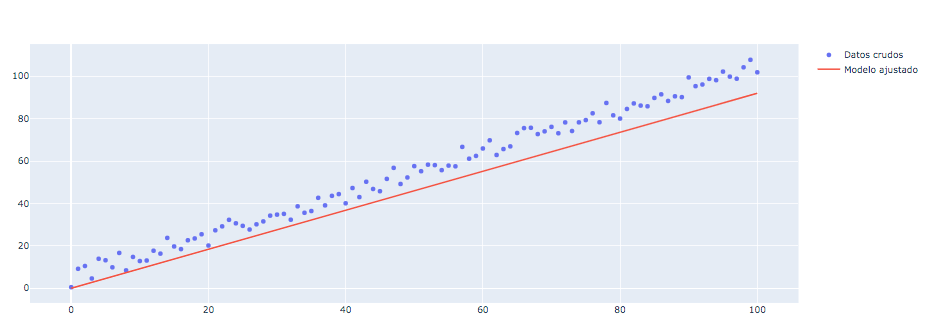

Comentarios:

De acuerdo a estos parametros podemos deducir que el actual modelo presenta un entrenamiento y predicci√≥n poco eficiente ya que la representatividad de los datos a traves de la linea de intersecci√≥n de estos esta sesgada.




###SOLUCI√ìN PROPUESTA AL MODELO: ‚öõ

**PARAMETROS üá∞**

En el modelo anterior tuvimos los siguientes parametros:


***Se utiliz√≥ una sola variable de entrada***
* model.add(tf.keras.layers.Input([1]))

***Se AGREGARON 4 neuronas en una sola capa oculta***

* model.add(tf.keras.layers.Dense(4, activation='linear'))

***Una sola variable de salida con funci√≥n de activaci√≥n linear***
* model.add(tf.keras.layers.Dense(1, activation='linear'))


***Se utilizo una funci√≥n de perdida de MSA y un Learning rate SGD de 1e-4***
* loss = tf.keras.losses.MeanSquaredError()
* optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4)

***Se entren√≥ por 80 epocas:***

* history = model.fit(x, y, epochs=80)

**Dentro de la vizualizaci√≥n de los parametros de medici√≥n se obtuvo lo siguiente:**

*   MSE: 13.965389459511993
*   R^2: 0.9834812703008357

MODELO:

Captura de pantalla 2024-09-09 a la(s) 15.03.22.png

**Comentarios:**
Como podemos observar estos parametros a comparaci√≥n de la situaci√≥n anterior son mejores debido a un mejor ajuste de la intersecci√≥n en la linea hacia el comportamiento de los datos, no obstante seria necesario experimentar con otros parametros para hacer un ajuste aun m√°s optimo, lo inusual de ello fue que en el MSA se optuvo una ponderaci√≥n de 13 lado contrario del modelo no tan eficiente con parametro de 87 aprox. en R^2 si hubo una mayor presici√≥n debido a que obtuvimos una poneraci√≥n arriba del 95 en comparaci√≥n a puntos 80 del anterior modelo.

---

## **Regresi√≥n 02**

Ahora vamos a resolver un problema de regresi√≥n no necesariamente lineal.

In [ ]:
import numpy as np

x = np.linspace(-4 * np.pi, 4 * np.pi, 1000)
y = np.sin(x) + 0.5 * np.random.randn( len(x))

In [ ]:
import plotly.express as px


fig = px.scatter(x=x, y=y)
fig.show()

En este vizualizaci√≥n de datos aleatorios como modo de ejemplo, ferro nos hace la prgunta principal, como podemos crear un red neuronal que se ajuste a este tipo de comportamiento de los datos de la funci√≥n en curva.

### **Modelo**

Una vez que se preseci√≥ el ondefiften para poder hacer un mejor modelo recurrimos a las capas ocultas:



*   **model.add(tf.keras.layers.Dense(4, activation='linear'))**

Ferro cambio las capas ocultas al modificar la activaci√≥n 'agregando funciones no lineales como tanh y modificando las capas es decir:



*   **model.add(tf.keras.layers.Dense(64, activation='tanh'))**
*   **model.add(tf.keras.layers.Dense(128, activation='tahn'))**
*   **model.add(tf.keras.layers.Dense(64, activation='tanh'))**









In [ ]:
import tensorflow as tf

#opcional
 #fijar valores random utilizando una semilla --> tf.random.set_seed(42) √≥ np.random.seed(42) --> lo valores de los modelos cambian por los pesos.

# TODO: Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input([1])) # Hint: Input layer is Input([1])


# TODO: Create at least 1 hidden layer
model.add(tf.keras.layers.Dense(64, activation='tanh'))
model.add(tf.keras.layers.Dense(128, activation='tanh')) #CAPAS OCULTAS ADICIONALES
model.add(tf.keras.layers.Dense(128, activation='tanh'))

model.add(tf.keras.layers.Dense(1, activation='linear')) # Hint: Output layer is Dense(1) w/linear activation

### **Optimizador y funci√≥n de p√©rdida**

$$ \mathrm{MSE}=\frac{1}{N}\cdot\sum_{i=1}^N \left(y_i- \hat{y}_i \right )^2 $$

In [ ]:
# TODO: Create loss function and optimizer
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3) # Try Adam(learning_rate=1e-3)

In [ ]:
# TODO: Integrate all here!
model.compile(loss=loss, optimizer=optimizer, metrics=[loss])

In [ ]:
model.summary()

Model: "sequential_47"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_166 (Dense)                    ‚îÇ (None, 64)                  ‚îÇ             128 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_167 (Dense)                    ‚îÇ (None, 128)                 ‚îÇ           8,320 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_168 (Dense)                    ‚îÇ (None, 128)                 ‚îÇ          16,512 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_169 (Dense)                    ‚îÇ (None, 1)                   ‚îÇ             129 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 25,089 (98.00 KB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 0 (0.00 B)

### **Entrenamiento del modelo**

In [ ]:
history = model.fit(x, y, epochs=150)

Epoch 1/150
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 19ms/step - loss: 0.8238 - mean_squared_error: 0.8249
Epoch 2/150
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - loss: 0.8272 - mean_squared_error: 0.8278
Epoch 3/150
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - loss: 0.7357 - mean_squared_error: 0.7351
Epoch 4/150
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - loss: 0.6804 - mean_squared_error: 0.6799
Epoch 5/150
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - loss: 0.6227 - mean_squared_error: 0.6223
Epoch 6/150
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - loss: 0.6321 - mean_squared_error: 0.6315
Epoch 7/150
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - loss: 0.6852 - mean_squared_error: 0.6847
Epoch 8/150
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
import plotly.express as px


losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='√âpocas', y='Error')
)
fig.show()

### **Reconstrucci√≥n del modelo**

In [ ]:
# Build output over original x
y_pred_model = model.predict(x)

32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step


In [ ]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x, y=y, mode='markers', name='Datos crudos')
)
fig.add_trace(
    go.Scatter(x=x, y=y_pred_model.flatten(), mode='lines', name='Modelo ajustado')
)

fig.show()

###SOLUCI√ìN DE MODELO CON PARAMETROS ANTERIORES:

**MODELO ACTUAL Y PARAMETROS üá∞**

En el modelo anterior tuvimos los siguientes parametros:


***Se utiliz√≥ una sola variable de entrada***
* model.add(tf.keras.layers.Input([1]))

***Una sola variable de salida con funci√≥n de activaci√≥n linear***
* model.add(tf.keras.layers.Dense(1, activation='linear'))


***Se utilizo una funci√≥n de perdida de MSA y un Learning rate ADAM de 1e-3***
* loss = tf.keras.losses.MeanSquaredError()
* optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

***Se entren√≥ por 200 epocas:***

* history = model.fit(x, y, epochs=200)

MODELO:



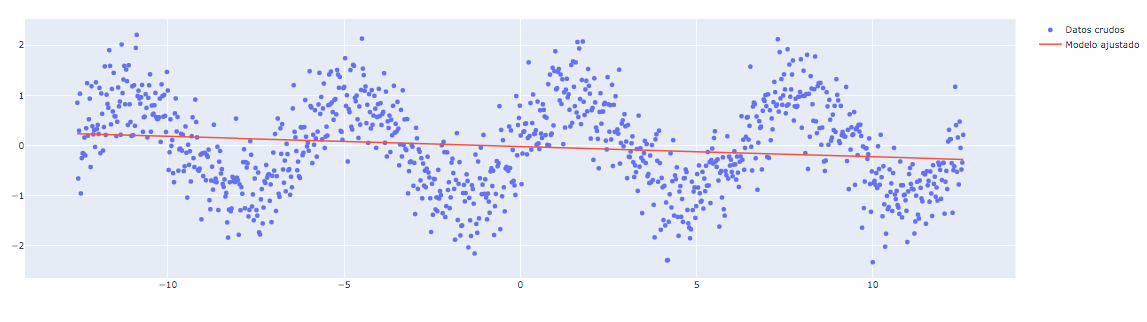


Comentarios:

La variable de salida con funci√≥n de activaci√≥n "linear" no fue suficiente debido a que el modelo present√≥ onderfifteen el cual NO ESTA BIEN ya que no esta ajustandose a todos los datos solo los pondera pero no los predice.

En este escenario se menciona que a pesar de agregar m√°s capas densas en la funci√≥n de activaci√≥n, nos arroja que finalmente funciones que no saben reconocer datos no lineales por lo que recurre a configurar el tipo de acivaci√≥n al agregar funciones no lineales entre las capss ocultas (intermedias) tipo: tanh

###**SOLUCI√ìN PROPUESTA DEL MODELO** ‚öõ


---



**MODELO ACTUAL Y PARAMETROS üá∞**

En el modelo anterior tuvimos los siguientes parametros:


***Se utiliz√≥ una sola variable de entrada***
* model.add(tf.keras.layers.Input([1]))

***3 capas ocultas con 64,128, 64 neuronas con funci√≥nes de activaci√≥n tanh:***
*   model.add(tf.keras.layers.Dense(64, activation='tanh'))
*   model.add(tf.keras.layers.Dense(128, activation='tahn'))
*   model.add(tf.keras.layers.Dense(64, activation='tanh'))


***Una sola variable de salida con funci√≥n de activaci√≥n linear***
* model.add(tf.keras.layers.Dense(1, activation='linear'))


***Se utilizo una funci√≥n de perdida de MSA y un Learning rate ADAM de 1e-3***
* loss = tf.keras.losses.MeanSquaredError()
* optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

***Se entren√≥ por 150 epocas:***

* history = model.fit(x, y, epochs=150)

MODELO:


Captura de pantalla 2024-09-09 a la(s) 20.49.46.png



COMENTARIOS:

Se puede observar un mejor modelo a comparaci√≥n del inicial, mejorando la precici√≥n en la represntatividad de los datos, no obstante es de prescindir que el modelo aun puede ser ajustado de tal manera que pueda acceder a una mayor presici√≥n, se intentaron realizar diferentes funciones de activaci√≥n como sigmoid y otras que investigando eran de ayuda para el modelo, no obstante cotejando con la clase y probando el mejor ajuste de los datos fue con la activaci√≥n tanh, solo era necesario agregar las capas presentes para que este pueda identificar patrones y su aprendizaje sea mejor.

otro modelo con 3 capas intermedias.





RECOMENDACIONES FERRO:



1.   Jugar con las capas adicionales.
2.   Jugar con el numero de neuronas.
3.   Cambiar la funci√≥n de activaci√≥n --->linear, relu, tanh, softmax, sigmoid etc...n.





<center>
    *********
</center>

## **Secci√≥n III ‚Äì Ejercicio: Clasificaci√≥n 01**

Para este problema utilizaremos un dataset sint√©tico ya conocido:

Clasificaci√≥n binaria, es decir ver si algo pertenece a una clase o a otra clase.

In [ ]:
from sklearn.datasets import make_circles
import numpy as np


# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
import pandas as pd


circles = pd.DataFrame({"x1": x[:, 0], "x2": x[:, 1], "label":y})
circles.head()

x1        x2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0

In [ ]:
#OPCI√ìN DE x12 y x22 al cuadrado

circles['x12'] = circles['x1'] ** 2
circles['x22'] = circles['x2'] ** 2
circles.head()

x1        x2  label       x12       x22
0  0.754246  0.231481      1  0.568887  0.053583
1 -0.756159  0.153259      1  0.571776  0.023488
2 -0.815392  0.173282      1  0.664864  0.030027
3 -0.393731  0.692883      1  0.155024  0.480087
4  0.442208 -0.896723      0  0.195548  0.804113

In [ ]:
# Verify number of labels
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

In [ ]:
import plotly.express as px


fig = px.scatter(
    x=circles['x1'],
    y=circles['x2'],
    color=circles['label'].astype(str) # Discretize the color palette
)
fig.show()

### **Modelo**

In [ ]:
import tensorflow as tf


# TODO: Create the model using the Sequential API
# Hint - You can try:

#  - Input(2)
#  - Hidden layers - tanh
#  - Output layer(1) - sigmoid

model = tf.keras.Sequential()

#model.add(tf.keras.layers.Input([2]))
#model.add(tf.keras.layers.Dense(1, activation='tanh'))
#model.add(tf.keras.layers.Dense(2, activation='tanh'))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#2do metodo ferro --> con valores de entrada cuadraticos.
model.add(tf.keras.layers.Input([2]))
model.add(tf.keras.layers.Dense(1, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

soluci√≥n :

*   model.add(tf.keras.layers.Input([2]))
*   model.add(tf.keras.layers.Dense(64, activation='tanh'))
*   model.add(tf.keras.layers.Dense(5, activation='tanh'))
*   model.add(tf.keras.layers.Dense(1, activation='sigmoid'))




### **Optimizador y funci√≥n de p√©rdida**

$$ \mathrm{Binary Crossentropy}=-\frac{1}{N}\cdot\sum_{i=1}^N \left[y_i \log (\hat{y}_i) + (1 - y_i) \log (1 - \hat{y}_i) \right] $$


In [ ]:
# TODO: Create loss function and optimizer
loss = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-3) # Try Adam(learning_rate=3e-3)

In [ ]:
# TODO: Integrate all here!
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_50"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_172 (Dense)                    ‚îÇ (None, 1)                   ‚îÇ               3 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_173 (Dense)                    ‚îÇ (None, 1)                   ‚îÇ               2 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

### **Entrenamiento del modelo**

In [ ]:
#2da forma de resolici√≥n por valores al cuadrado
x2 = circles[['x12', 'x22']].values

In [ ]:
#history = model.fit(x, y, epochs=100)
#2da opci√≥n :
history = model.fit(x2, y, epochs=150)

Epoch 1/150
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 17ms/step - accuracy: 0.5203 - loss: 0.6934
Epoch 2/150
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - accuracy: 0.4997 - loss: 0.6912 
Epoch 3/150
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - accuracy: 0.5053 - loss: 0.6882 
Epoch 4/150
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - accuracy: 0.4986 - loss: 0.6843 
Epoch 5/150
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - accuracy: 0.4920 - loss: 0.6795 
Epoch 6/150
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - accuracy: 0.5408 - loss: 0.6710 
Epoch 7/150
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - accuracy: 0.7585 - loss: 0.6634 
Epoch 8/150
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - accuracy: 0.8928 - loss: 

In [ ]:
import plotly.express as px


losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='√âpocas', y='Error')
)
fig.show()

In [ ]:
import plotly.express as px


losses = history.history['accuracy']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='√âpocas', y='Accuracy')
)
fig.show()

### **Evaluaci√≥n del modelo**

In [ ]:
#model.evaluate(x, y)
model.evaluate(x2, y)

32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0111


[0.011025200597941875, 1.0]

[0.05394923686981201, 1.0] --> estos parametros de arriba indica, el error final que queda y la presici√≥n.

In [ ]:
#y_pred = model.predict(x)
y_pred = model.predict(x2)

32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step


In [ ]:
def binarize_output(y_pred, threshold=0.5):
    return np.array([1 if x > threshold else 0 for x in y_pred])

threshold=0.5 --> el umbral lo definimos de acuerdo al contexto del analisis, es decir podemos definir si apartir de cierto numero sera 1 o 0. como orden de clasificaci√≥n.

In [ ]:
from sklearn.metrics import accuracy_score


y_pred_bin = binarize_output(y_pred)
print("Accuracy score:", accuracy_score(y, y_pred_bin))

Accuracy score: 1.0


print("Accuracy score:", accuracy_score(y, y_pred_bin)) --> este accuracy nos define un parametro sencillo para medir la precici√≥n de clasficiaci√≥n, es decir si los parametros dan (0,0) √≥ (1,1) esta por buen camino, pero si por el contrario nos da (1,0) √≥ (0,1) puede ser una predicci√≥n impresisa.

es decir y & y_pred , son salidas, la primera original y la segunda salida predicha.

> - **M√©tricas de clasificaci√≥n:** https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [ ]:
import plotly.express as px


fig = px.scatter(
    x=circles['x1'],
    y=circles['x2'],
    color=y_pred_bin.flatten().astype(str) # Discretize the color palette
)
fig.show()

---

SE RESUELVE EL PROBLEMA RESOLVIENDO INGENIERIA DE CARACTERISTICAS DE LOS DATOS. EJEMPLO X12, X22 --> ELEVACI√ìN AL CUADRADO.




*   A menor cantidad de capas ocultas (neuronas) es recomendable entrenar el modelo con un numero mayor de epocas.


*   Cuando se elevan las variables de entarda al cuadrado , el vizualziar estos datos obtenemos una dimensi√≥n lineal por lo que ferro sugiere que podemos experimentar por eliminar las capas densas y dejar solo la sigmoide debido a la transformaci√≥n de los datos. En este escenario hay que considerar agregar al modelo y funciones los datos transformados.







##**SOLUCI√ìN PROPUESTA Y PARAMETROS USADOS** ‚öõ


**Se usaron dos variables de entrada, una capa oculta con 1 neurona de activaci√≥n tahn y una capa de salida con funci√≥n sigmoid:**

*   model.add(tf.keras.layers.Input([2]))
*   model.add(tf.keras.layers.Dense(1, activation='tanh'))
*   model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

**Historial de entrenamiento: **
*   150 epocas

**Evalucaci√≥n del modelo:**
*   model.evaluate(x2, y) --> [0.011025200597941875, 1.0]

**Acurasy Score:**
*   Accuracy score: 1.0

**Comentarios:**

Dada las caracteristicas del modelo durante la configuraci√≥n se hizo una peque√±a ingenieria de los datos al convertilos a valores cuadr√°ticos, a la par de que se opt√≥ por funciones tanh y sigmoid que siendo valoradas con un historial de 150 epocas vast√≥ para poder tener una valoreaci√≥n de accurasy de 1.0 valor maximo de presici√≥n.

Teniendo como respuesta este tipo de error y accuracy :

Modelo:

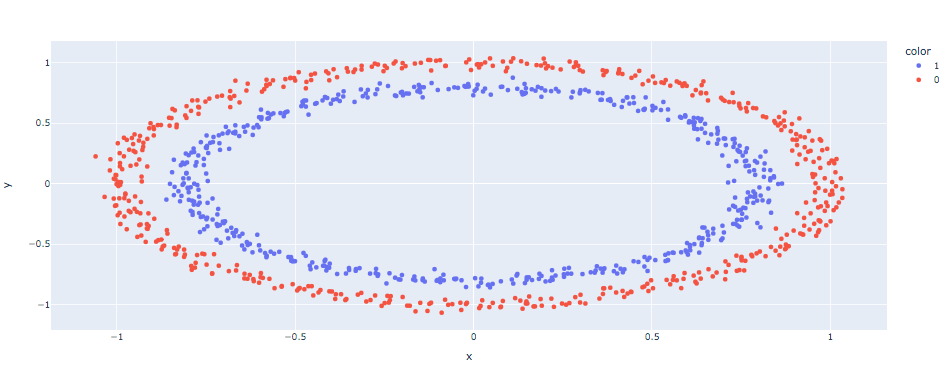Captura de pantalla 2024-09-09 a la(s) 21.18.24.png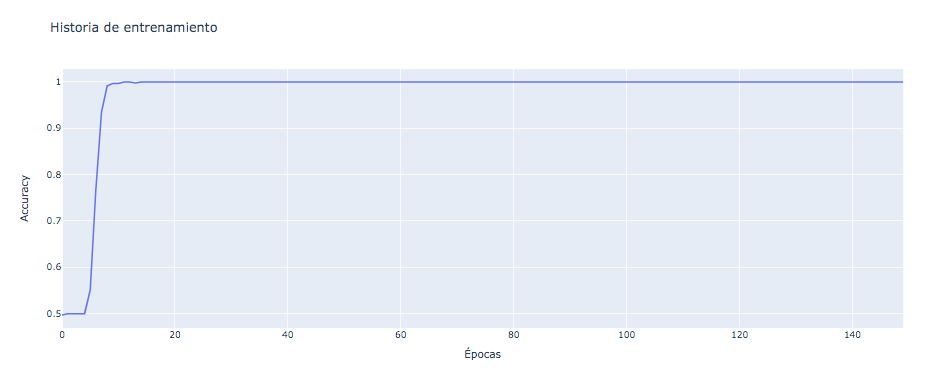



## **Clasificaci√≥n 02**

Ejercicio de clasificaci√≥n --> multiclase. / Retos de clasificaci√≥n con imagenes.

Ahora utilizaremos un conjunto de datos un poco m√°s complejo: el **MNIST dataset**.

El dataset est√° compuesto por im√°genes de 28x28 pixeles, que contienen un conjunto de d√≠gitos en 10 categor√≠as.

Los datos de MNIST est√°n disponibles directamente en la API de conjuntos de datos de `tf.keras`. Los cargas as√≠:

In [44]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

Llamar a `load_data` en este objeto nos dar√° dos conjuntos con los valores de entrenamiento y prueba para los gr√°ficos que contienen las prendas y sus etiquetas.

In [45]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

¬øC√≥mo se ven estos valores?

Imprimamos una imagen de entrenamiento y una etiqueta de entrenamiento para ver.

Label: 9
Matrix: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 128 128 255 255 255 191  64   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 128 255 255 255 255 255 255 255 255 128   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 191 255 255 255 255 2

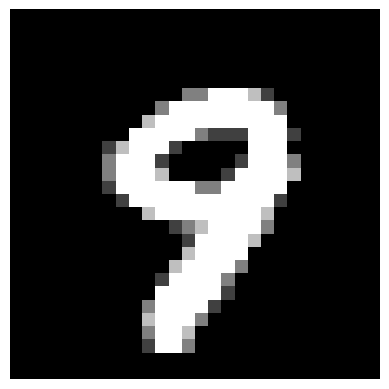

In [46]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 5999 # 6000 -1

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print('Label:', training_labels[img_index])
print('Matrix:', training_images[img_index])

In [ ]:
#ESTIRAR
#training_images[img_index].flatten()

### **Preparaci√≥n de los datos**

Notar√°s que todos los valores est√°n entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es m√°s f√°cil si transformamos los valores para tratar todos con valores entre 0 y 1. Este proceso se llama **estandarizaci√≥n**.

In [47]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Label: 9
Matrix: [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         

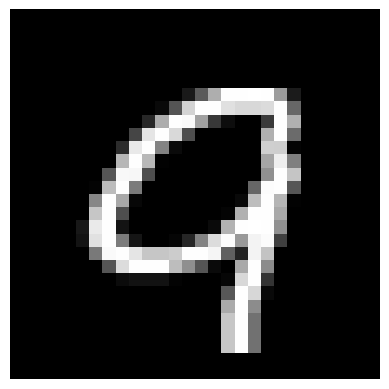

In [48]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 3000 # 6000 -1

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print('Label:', training_labels[img_index])
print('Matrix:', training_images[img_index])

In [49]:
training_images[0].shape

(28, 28)

### **Modelo**



**model.add(tf.keras.layers.Flatten())**
[28, 28] -> [...] si tenemos un vector de 28 x 28 cual seria la dimensi√≥n de ese vector? es decir cuantos elementos de entrada va a tener?

RESPUESTA = La multiplicaci√≥n de ellos. por tanto seria un flatten que estiraria dicho victor y nos daria un vector de 784 pixeles. todos en un vector

Para la capa de salida ya no tenemos solamente dos clases por tanto se haacen las sig. observaciones

*   Tendremos una funci√≥n softmax --> con 10 salidas para que mapie cada una de las clases a valores entre 0 y 1 y se debe observar que clase tiene la probabilidad mas alta.






In [50]:
# TODO: Create the model using the Sequential API
# Hint - You can try:
#  - Flatten()
#  - Hidden layers - relu
#  - Output layer(10) - softmax

model = tf.keras.models.Sequential()

#[28, 28] -> [784]
model.add(tf.keras.layers.Flatten())

# [
#   0--> [0,1]
#   1
#   ...
#   9
# ]
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))



> **Softmax Activation Function: Everything You Need to Know** - https://www.pinecone.io/learn/softmax-activation/


### **Optimizador y funci√≥n de p√©rdida**

In [51]:
# TODO: Create loss function and optimizer
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD() # Try SGD()

In [52]:
# TODO: Integrate everything here!
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)

### **Entrenamiento del modelo**

Para entrenar el modelo, simplemente utilizamos el m√©todo `.fit()` del modelo.

In [53]:
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.5848 - loss: 1.3092
Epoch 2/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.9030 - loss: 0.3339
Epoch 3/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.9236 - loss: 0.2629
Epoch 4/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.9340 - loss: 0.2284
Epoch 5/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.9410 - loss: 0.2007
Epoch 6/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.9475 - loss: 0.1769
Epoch 7/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.9525 - loss: 0.1595
Epoch 8/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy

In [54]:
model.summary()

Model: "sequential_6"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ flatten_6 (Flatten)                  ‚îÇ (32, 784)                   ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_17 (Dense)                     ‚îÇ (32, 32)                    ‚îÇ          25,120 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_18 (Dense)                     ‚îÇ (32, 64)                    ‚îÇ           2,112 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_19 (Dense)                     ‚îÇ (32, 32)                    ‚îÇ           2,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_20 (Dense)                     ‚îÇ (32, 10)                    ‚îÇ             330 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 29,644 (115.80 KB)

 Trainable params: 29,642 (115.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)


> **Pregunta clave:** ¬øQu√© sucede con la historia de entrenamiento?

In [55]:
import plotly.express as px


seen = 'accuracy' # or 'loss'

hist_values = history.history[seen]
eje_x = np.arange(len(hist_values))

fig = px.line(
    x=eje_x,
    y=hist_values,
    title='Historia de entrenamiento',
    labels=dict(x='√âpocas', y=seen.capitalize())
)
fig.show()

### Evaluaci√≥n del modelo

In [56]:
model.evaluate(test_images, test_labels)

#.    ERROR -------------  ACCURACY

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9511 - loss: 0.1555


[0.13856388628482819, 0.957099974155426]

### Predicci√≥n


Label: 1
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 83ms/step
Prediction: 1


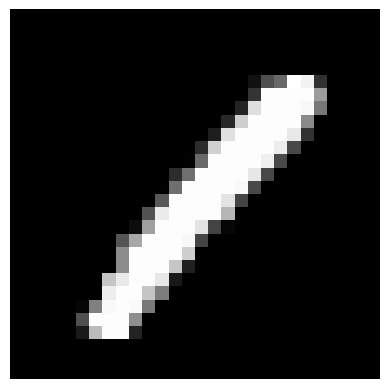

In [57]:
import random

test_index = random.randint(0, 10000 - 1)

plt.imshow(test_images[test_index], cmap='gray')
plt.axis(False)

print('Label:', test_labels[test_index])
input_image = np.reshape(test_images[test_index], (1, 784))
prediction = model.predict(np.expand_dims(input_image, axis=-1))
print('Prediction:', np.argmax(prediction))

In [58]:
prediction

array([[7.1371836e-08, 9.9681962e-01, 1.0385260e-04, 1.2517443e-05, 6.2594347e-04, 6.8129440e-05, 2.2386168e-06, 1.1241600e-03, 1.2429819e-03, 3.9770751e-07]], dtype=float32)

> **Para resolver el reto es:** Mejorar el accuracy obtenido en la clase.

**Puedes explorar:**
- El n√∫mero de capas.
- Las √©pocas de entrenamiento.
- Las funciones de activaci√≥n.
- Investigar otras capas.

In [ ]:
#training_imagines.shape

 # (R, G, B) (3000, 28, 28)

NameError: name 'training_imagines' is not defined

##SOLUCI√ìN PROPUESTA Y PARAMETROS USADOS ‚öõ

Dentro de este modelo con los parametros anteriores lo unico que se modifico o bien agrego fue lo siguiente:

***Se usaron dos variables de entrada, 3 capas ocultas con 32 , 64, 32 neuronas de activaci√≥n respectivamente con activaci√≥n relu y una capa de salida con funci√≥n softmax:***


*   model = tf.keras.models.Sequential()
*   model.add(tf.keras.layers.Flatten())
*   model.add(tf.keras.layers.Dense(32, activation = 'relu'))
*   model.add(tf.keras.layers.Dense(64, activation = 'relu'))
*   model.add(tf.keras.layers.Dense(32, activation = 'relu'))
*   model.add(tf.keras.layers.Dense(10, activation = 'softmax'))


**Historial de entrenamiento:**

*   10 epocas

**Optimizador**

* Learning_rate ADAM con valor predeterminado


**Evaluaci√≥n del modelo:**

model.evaluate(test_images, test_labels) --> [0.13856388628482819, 0.957099974155426]

**Comentarios:**
Dado las caractetisticas, se puede deducir que el modelo mejor√≥ con un nivel de precisi√≥n arriba del 95%, sin embargo considero que a√∫n se pueden hacer ajustes para utilizar menos capas ocultas. Se estuvo intentando y tambien se observaron con solo una capa oculta pero incrementando el numero de neuronas y de epocas.

--------

> Contenido creado por **Rodolfo Ferro**, 2024. <br>
> Para cualquier retroalimentaci√≥n, puedes contactarme a trav√©s del correo [ferro@cimat.mx](mailto:ferro@cimat.mx).